In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
train =  train.drop(columns = ['Cabin'],axis=1)
test =  test.drop(columns = ['Cabin'],axis=1)
train = train.dropna(axis = 0,subset=['Embarked'],how='any')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.033681,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.082446,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.365902,0.081656,0.016824,-0.548193
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.057686,-0.034040,0.081656,-0.307351,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.187896,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.093143,0.160887,0.217532,1.000000


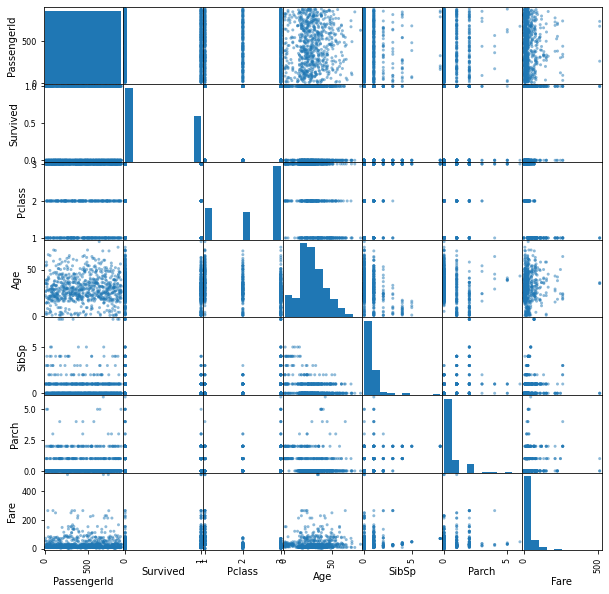

In [23]:
pd.plotting.scatter_matrix(train,figsize=(10,10));

In [24]:
train["Embarked"].isnull().sum()

0

In [25]:
# Nearly 20% of data is missing, can't risk losing all of the data
train.Age.isnull().mean() *100

19.910011248593925

In [26]:
# Use mean/median imputation
train['Age'].fillna( train['Age'].median() , inplace=True)
test['Age'].fillna( train['Age'].median() , inplace=True)
test['Fare'].fillna( train['Fare'].median() , inplace=True)

In [27]:
# No missing values now
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [28]:
# drop those who don't have logical impact eg : names, id's...
# Sex

train["Sex"] = pd.get_dummies(train["Sex"],drop_first=True)
test["Sex"]= pd.get_dummies(test["Sex"],drop_first=True)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [29]:
# Name
train =  train.drop(columns = ['Name'],axis=1)
test =  test.drop(columns = ['Name'],axis=1)

In [30]:
# Ticket Number
train =  train.drop(columns = ['Ticket'],axis=1)
test =  test.drop(columns = ['Ticket'],axis=1)

In [31]:
# Id
ID = test.PassengerId
train =  train.drop(columns = ['PassengerId'],axis=1)
test =  test.drop(columns = ['PassengerId'],axis=1)

In [32]:
# Embarked
train["Embarked"]= np.where(train["Embarked"]=="C",1,np.where(train["Embarked"]=="S",2,3))
test["Embarked"]= np.where(test["Embarked"]=="C",1,np.where(test["Embarked"]=="S",2,3))


In [33]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [34]:
X_train = train.drop(columns = ['Survived'],axis=1)
y_train = train.Survived

In [35]:
def sigmoid(input):    
  output = 1 / (1 + np.exp(-input))
  return output

In [36]:
def costFunction(theta, X, y):
    m = y.size  
    J=0
    h = sigmoid(np.dot(X, theta.T))
    J = 1/m * np.sum(-y*np.log(h) - (1-y) * np.log(1-h))
    return J

In [37]:
def gradientDecsent(iterations, alpha, x, y):
  m = x.shape[0]
  x = np.concatenate([np.ones((m, 1)), x], axis=1)
  y = y.to_numpy()
  y = np.reshape(y, (len(y),1))  
  theta = np.full((1, x.shape[1]), 0)
  # theta = theta.copy()
  cost_history = []
  for i in range(iterations):
    theta = theta - (alpha / m) * np.transpose(sigmoid(np.dot(x, theta.T)) - y).dot(x)
    cost_history.append(costFunction(theta, x, y))
  return theta, cost_history 

In [38]:
#theta, cost_history = gradientDecsent(200000, 0.0042, x, y)
theta, cost_history = gradientDecsent(200000, 0.002, X_train, y_train)
print(theta)

[[ 3.70030795 -0.8427771  -2.566677   -0.02884885 -0.31598277 -0.09342107
   0.00522164  0.07626175]]


Text(0, 0.5, 'Cost J')

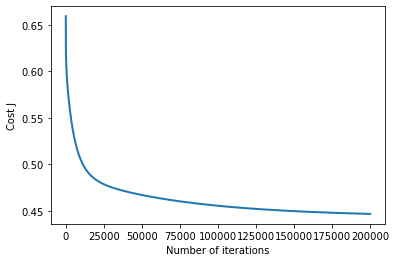

In [39]:
plt.plot(np.arange(len(cost_history)), cost_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')   

In [41]:
x_ones = np.concatenate([np.ones((test.shape[0], 1)),test], axis=1)
y_pred = sigmoid(np.dot(x_ones, theta.T))

In [42]:
y_pred_final = []
for i in y_pred:
  if i >= 0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
print(y_pred_final)      

[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [43]:
#saving results
# y_pred = np.array(y_pred)
submission = {'PassengerId':ID,'Survived':y_pred_final}
submission = pd.DataFrame(submission)
submission.to_csv("Submission.csv", index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
